<a href="https://www.kaggle.com/code/tarizatique/web-scraping-and-sentiment-anaysis-imdb?scriptVersionId=106057883" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Objectives of Project

1. Reviews Preprocessing and Cleaning
2. Story Generation and Visualization from reviews
3. Extracting Features from Cleaned reviews
4. Building Wordclouds
5. Sentiment Analysis

In [1]:
#importing Libraries
import pandas as pd
import requests
import pandas as pd
from bs4 import BeautifulSoup
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('omw-1.4')
from nltk.util import ngrams
from wordcloud import WordCloud, STOPWORDS
nltk.download('punkt')
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#getting the url of the website we want to scrap
url = "https://www.imdb.com/title/tt0111161/reviews?ref_=tt_urv"
page = requests.get(url)
page


<Response [200]>

In [4]:
#changing the raw format to  alignment
soup = BeautifulSoup(page.content,"html.parser")
soup.prettify()
scrape_review = soup.find_all('div', class_="text show-more__control")
#you can also shothe raw data scraped these may take too much space and it will waste enough time in scrolling


In [5]:
#creating an empty list naming movie and adding all review into them
#sparse review
movies = []
for movie in scrape_review:
    movie = movie.get_text().replace('\n', "")
    movie = movie.strip(" ")
    movies.append(movie)
    movie = movie.strip(" ")
   

In [6]:
#you can chekc all review here
movies

['The Shawshank Redemption is written and directed by Frank Darabont. It is an adaptation of the Stephen King novella Rita Hayworth and Shawshank Redemption. Starring Tim Robbins and Morgan Freeman, the film portrays the story of Andy Dufresne (Robbins), a banker who is sentenced to two life sentences at Shawshank State Prison for apparently murdering his wife and her lover. Andy finds it tough going but finds solace in the friendship he forms with fellow inmate Ellis "Red" Redding (Freeman). While things start to pick up when the warden finds Andy a prison job more befitting his talents as a banker. However, the arrival of another inmate is going to vastly change things for all of them.There was no fanfare or bunting put out for the release of the film back in 94, with a title that didn\'t give much inkling to anyone about what it was about, and with Columbia Pictures unsure how to market it, Shawshank Redemption barely registered at the box office. However, come Academy Award time th

**Text Cleaning**

In [7]:
# writng reviews in a text file 
with open("movies.txt", "w", encoding='utf8') as output:
    output.write(str(movies))
    
    # Joinining all the reviews into single paragraph 
    ip_rev_string = " ".join(movies)

In [8]:


# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+", " ", ip_rev_string).lower()
# ip_rev_string = re.sub("[0-9" "]+"," ", ip_rev_string)

# words that contained in the reviews
ip_reviews_words = ip_rev_string.split(" ")

ip_reviews_words = ip_reviews_words[1:]

In [9]:
#converting into sparse matrix
cv = CountVectorizer()
X =cv.fit_transform(ip_reviews_words)

In [10]:
#adding my stopwords custom gile you can either download it from nltk library
with open("../input/stopwords/stopwords.txt", "r") as sw:
    stop_words = sw.read()
    
stop_words = stop_words.split("\n")

#adding some custom that are not present in stopwords file
stop_words.extend(["movie","film","shawshank","time","prison","tim robbins","morgan","freeman","stephen","king","tim","robbins","andy","shawsank redemption","redemption","character","movies","tim robbins","stephen king","morgan freeman","frank darabont","andy dufresne"])

ip_reviews_words = [w for w in ip_reviews_words if not w in stop_words]

# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)

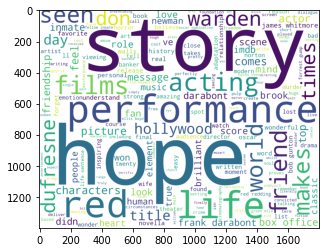

In [11]:
# WordCloud can be performed on the string inputs.
# Corpus level word cloud

wordcloud_ip = WordCloud(background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)
plt.imshow(wordcloud_ip)

In [12]:
# positive words # Choose the path for +ve words stored in system
with open("../input/positvie-words/positve words.txt","r") as pos:
  poswords = pos.read().split("\n")

# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

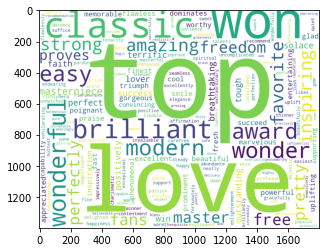

In [13]:
wordcloud_pos_in_pos = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.figure(2)
plt.imshow(wordcloud_pos_in_pos)

In [14]:
# negative words Choose path for -ve words stored in system
with open("../input/stopwords/Negative words.txt", "r") as neg:
  negwords = neg.read().split("\n")

# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

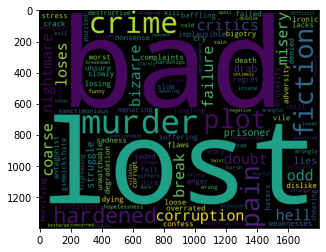

In [15]:
#wordcloud with negative words
wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)
plt.figure(3)
plt.imshow(wordcloud_neg_in_neg)

In [16]:
#lemmetization
WNL = nltk.WordNetLemmatizer()

In [17]:
# Lowercase and tokenize
text = ip_rev_string.lower()

# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")

tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)


In [18]:

# Remove extra chars and remove stop words.
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

# Create a set of stopwords
stopwords_wc = set(STOPWORDS)
customised_words = ["movie","film","shawshank","time","prison","tim robbins","morgan","freeman","stephen","king","tim","robbins","andy","shawsank redemption","redemption","character","movies","tim robbins","stephen king","morgan freeman","frank darabont","andy dufresne" ]
# If you want to remove any particular word form text which does not contribute much in meaning

new_stopwords = stopwords_wc.union(customised_words)


In [19]:
# Remove stop words
text_content = [word for word in text_content if word not in new_stopwords]

# Take only non-empty entries
text_content = [s for s in text_content if len(s) != 0]

# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]
 

**Unigram**

In [21]:
#Unigram
unigram = []
n = 1
unigrams = ngrams(text_content, n)
for item in unigrams:
   
   print(item)

('written',)
('directed',)
('frank',)
('darabont',)
('adaptation',)
('novella',)
('rita',)
('hayworth',)
('starring',)
('portrays',)
('story',)
('dufresne',)
('banker',)
('sentenced',)
('life',)
('sentence',)
('apparently',)
('murdering',)
('wife',)
('lover',)
('tough',)
('solace',)
('friendship',)
('form',)
('fellow',)
('inmate',)
('elli',)
('red',)
('redding',)
('start',)
('pick',)
('warden',)
('job',)
('befitting',)
('talent',)
('banker',)
('arrival',)
('inmate',)
('vastly',)
('change',)
('fanfare',)
('bunting',)
('release',)
('title',)
('didn',)
('inkling',)
('columbia',)
('picture',)
('unsure',)
('market',)
('barely',)
('registered',)
('box',)
('office',)
('academy',)
('award',)
('received',)
('nomination',)
('won',)
('none',)
('stirred',)
('home',)
('entertainment',)
('release',)
('rest',)
('history',)
('finally',)
('found',)
('audience',)
('propelled',)
('mythical',)
('proportion',)
('endearing',)
('modern',)
('day',)
('classic',)
('delighted',)
('fan',)
('whilst',)
('simultaneo

**Bigrams**

In [22]:

bigrams_list = list(nltk.bigrams(text_content))
# we can show and print ot
print(bigrams_list)

[('written', 'directed'), ('directed', 'frank'), ('frank', 'darabont'), ('darabont', 'adaptation'), ('adaptation', 'novella'), ('novella', 'rita'), ('rita', 'hayworth'), ('hayworth', 'starring'), ('starring', 'portrays'), ('portrays', 'story'), ('story', 'dufresne'), ('dufresne', 'banker'), ('banker', 'sentenced'), ('sentenced', 'life'), ('life', 'sentence'), ('sentence', 'apparently'), ('apparently', 'murdering'), ('murdering', 'wife'), ('wife', 'lover'), ('lover', 'tough'), ('tough', 'solace'), ('solace', 'friendship'), ('friendship', 'form'), ('form', 'fellow'), ('fellow', 'inmate'), ('inmate', 'elli'), ('elli', 'red'), ('red', 'redding'), ('redding', 'start'), ('start', 'pick'), ('pick', 'warden'), ('warden', 'job'), ('job', 'befitting'), ('befitting', 'talent'), ('talent', 'banker'), ('banker', 'arrival'), ('arrival', 'inmate'), ('inmate', 'vastly'), ('vastly', 'change'), ('change', 'fanfare'), ('fanfare', 'bunting'), ('bunting', 'release'), ('release', 'title'), ('title', 'didn')

In [23]:

dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

['written directed', 'directed frank', 'frank darabont', 'darabont adaptation', 'adaptation novella', 'novella rita', 'rita hayworth', 'hayworth starring', 'starring portrays', 'portrays story', 'story dufresne', 'dufresne banker', 'banker sentenced', 'sentenced life', 'life sentence', 'sentence apparently', 'apparently murdering', 'murdering wife', 'wife lover', 'lover tough', 'tough solace', 'solace friendship', 'friendship form', 'form fellow', 'fellow inmate', 'inmate elli', 'elli red', 'red redding', 'redding start', 'start pick', 'pick warden', 'warden job', 'job befitting', 'befitting talent', 'talent banker', 'banker arrival', 'arrival inmate', 'inmate vastly', 'vastly change', 'change fanfare', 'fanfare bunting', 'bunting release', 'release title', 'title didn', 'didn inkling', 'inkling columbia', 'columbia picture', 'picture unsure', 'unsure market', 'market barely', 'barely registered', 'registered box', 'box office', 'office academy', 'academy award', 'award received', 'rec

In [24]:
# Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_

{'written directed': 2757,
 'directed frank': 638,
 'frank darabont': 977,
 'darabont adaptation': 534,
 'adaptation novella': 50,
 'novella rita': 1664,
 'rita hayworth': 2059,
 'hayworth starring': 1091,
 'starring portrays': 2300,
 'portrays story': 1841,
 'story dufresne': 2328,
 'dufresne banker': 703,
 'banker sentenced': 160,
 'sentenced life': 2174,
 'life sentence': 1360,
 'sentence apparently': 2169,
 'apparently murdering': 93,
 'murdering wife': 1590,
 'wife lover': 2684,
 'lover tough': 1430,
 'tough solace': 2515,
 'solace friendship': 2246,
 'friendship form': 1004,
 'form fellow': 961,
 'fellow inmate': 886,
 'inmate elli': 1245,
 'elli red': 751,
 'red redding': 1981,
 'redding start': 1993,
 'start pick': 2301,
 'pick warden': 1801,
 'warden job': 2634,
 'job befitting': 1307,
 'befitting talent': 177,
 'talent banker': 2408,
 'banker arrival': 156,
 'arrival inmate': 109,
 'inmate vastly': 1253,
 'vastly change': 2592,
 'change fanfare': 326,
 'fanfare bunting': 854,

In [25]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[:100])

[('box office', 9), ('frank darabont', 8), ('james whitmore', 7), ('bob gunton', 6), ('life sentence', 5), ('red redding', 5), ('forrest gump', 5), ('rita hayworth', 4), ('fellow inmate', 4), ('haven seen', 4), ('elli boyd', 4), ('green mile', 4), ('oscar nomination', 4), ('directed frank', 3), ('novella rita', 3), ('wife lover', 3), ('academy award', 3), ('modern day', 3), ('day classic', 3), ('warden norton', 3), ('clancy brown', 3), ('ve seen', 3), ('nominated seven', 3), ('special effect', 3), ('boyd red', 3), ('message hope', 3), ('tell story', 3), ('written directed', 2), ('story dufresne', 2), ('murdering wife', 2), ('inmate elli', 2), ('finally found', 2), ('william sadler', 2), ('hope character', 2), ('thomas newman', 2), ('newman score', 2), ('life world', 2), ('story acting', 2), ('make feel', 2), ('don forget', 2), ('friendship hope', 2), ('seen haven', 2), ('matter time', 2), ('acting top', 2), ('sentence hope', 2), ('performance career', 2), ('hope dream', 2), ('directing

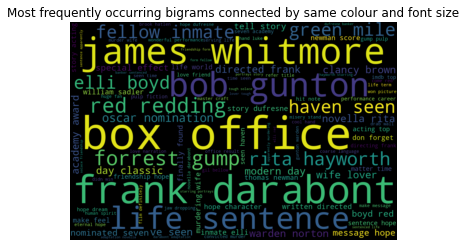

In [26]:
# Generating wordcloud
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 100
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, stopwords=new_stopwords)

wordCloud.generate_from_frequencies(words_dict)
plt.figure(4)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()